### [Science](https://www.science.org/doi/epdf/10.1126/science.aar5169)  
### [MIGNN](https://www.nature.com/articles/s41467-023-39283-x)
### [MIGNN-SI](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-023-39283-x/MediaObjects/41467_2023_39283_MOESM1_ESM.pdf)
### [DRFP](https://pubs.rsc.org/en/content/articlelanding/2022/dd/d1dd00006c#!)
### [MFF](https://www.sciencedirect.com/science/article/pii/S2451929420300851)
### [p-GNN](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-024-00818-z)
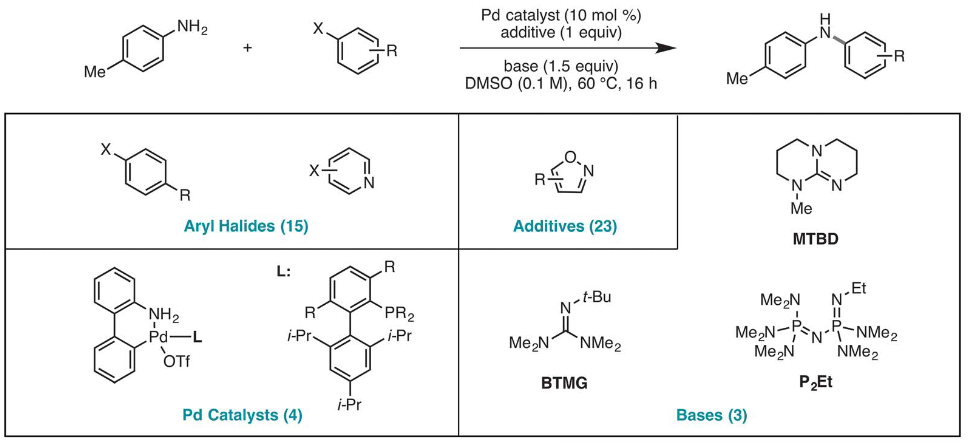
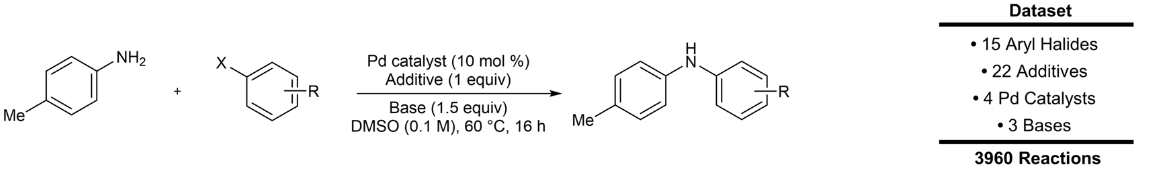

In [4]:
import pandas as pd
import torch
import numpy as np
import SP
import os
os.chdir(r'/data/coding/Buchwald')

In [5]:
df = pd.read_csv('Buchwald.csv')
df.head(3)

,Ligand,Additive,Base,Aryl halide,Product,Output
0,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,Cc1cc(C)on1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Clc1ccccn1,Cc1ccc(Nc2ccccn2)cc1,70.410458
1,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Brc1ccccn1,Cc1ccc(Nc2ccccn2)cc1,11.064457
2,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,CCc1ccc(I)cc1,CCc1ccc(Nc2ccc(C)cc2)cc1,10.223550


# Mordred Input File

In [172]:
smiles = SP.std(df['Product'].unique().tolist())
writer = Chem.SmilesWriter('Product.smi', includeHeader=False)
for smi in smiles:
    m = Chem.MolFromSmiles(smi)
    writer.write(m)
writer.close()

# Mordred feature processing

In [191]:
files = ['Ligand.csv', 'Additive.csv', 'Base.csv', 'Aryl_halide.csv', 'Product.csv']
df1 = pd.read_csv(files[4])
df1['name'] = df['Product'].unique().tolist()
df1.set_index('name', inplace=True)
df1.loc[df['Product']].to_csv('Product.csv', index=False)

In [1]:
import pandas as pd
import torch
import numpy as np
import FPT
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'/data/coding/Buchwald')

In [2]:
files = ['Ligand.csv', 'Additive.csv', 'Base.csv', 'Aryl_halide.csv', 'Product.csv']
df = pd.read_csv('Buchwald.csv')
df.head(3)

,Ligand,Additive,Base,Aryl halide,Product,Output
0,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,Cc1cc(C)on1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Clc1ccccn1,Cc1ccc(Nc2ccccn2)cc1,70.410458
1,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Brc1ccccn1,Cc1ccc(Nc2ccccn2)cc1,11.064457
2,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,CCc1ccc(I)cc1,CCc1ccc(Nc2ccc(C)cc2)cc1,10.223550


In [17]:
df1 = pd.read_csv(files[4])
df1 = df1.dropna(axis=1, how='any')
df1.shape

(3955, 1486)

In [18]:
df2 = FPT.select_top_features_with_rf_for_Regression(df1,df.iloc[:, -1],100)
df2.index = range(df2.shape[0])

In [19]:
df2.to_csv('Product_new.csv')

In [3]:
x = np.arange(0.9, 1.0, 0.01)
y = []
for file in files:
    for i in x:
        y.append(FPT.remove_highly_correlated_features(file, i).shape[1])

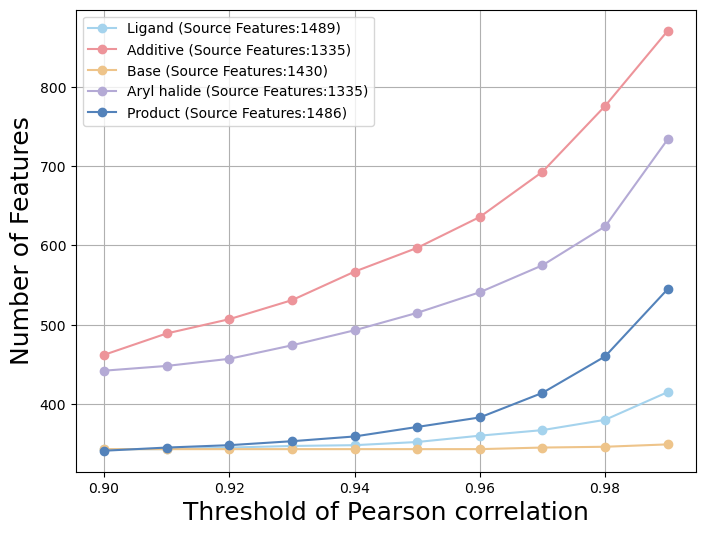

In [13]:
# 绘制折线图
# 设置图形大小
plt.figure(figsize=(8, 6)) 

# 定义颜色和标记列表
colors = [(165/255, 211/255, 237/255), (237/255, 148/255, 154/255), (238/255, 196/255, 138/255)
          ,(180/255, 170/255, 213/255),(83/255, 130/255, 186/255)]

labels = ['Ligand (Source Features:1489)', 'Additive (Source Features:1335)', 'Base (Source Features:1430)',
          'Aryl halide (Source Features:1335)', 'Product (Source Features:1486)']

# 为每条折线定义标签和颜色
for idx, y_sub in enumerate(np.array(y).reshape(5,-1)):
    plt.plot(x, y_sub, marker='o', color=colors[idx], label=labels[idx])  

plt.xlabel('Threshold of Pearson correlation', fontsize=18)
plt.ylabel('Number of Features', fontsize=18)

# 显示网格
plt.grid(True)

# 显示图例，通常放在图的右上角，但也可以指定位置，如'upper left', 'lower right'等
plt.legend(loc='upper left', fontsize=10)

# 显示图表
plt.show()

# Graph Dataset

In [1]:
import torch
import pandas as pd
import numpy as np
import BRG
from BRG import CustomGraphDataset
import os
os.chdir(r'/data/coding/Buchwald')

In [2]:
#文件读取顺序必须对应特征节点
files = ['Aryl_halide_new.csv', 'Product_new.csv', 'Base_new.csv', 'Ligand_new.csv', 'Additive_new.csv']
features = BRG.load_and_preprocess_data(files)

In [25]:
edge = torch.tensor([[0,0,0,1,1,2,2,3,3,4,4,4,4,4],
                    [0,1,2,1,0,2,3,3,1,0,1,2,3,4]], dtype=torch.long)
datas = BRG.create_all_graphs(features, edge)

Creating graphs: 100%|██████████| 3955/3955 [00:00<00:00, 7040.81it/s]


In [26]:
labels = pd.read_csv('Buchwald.csv').iloc[:, -1].values/100
dataset = CustomGraphDataset(datas, labels)

In [27]:
torch.save(dataset, 'BH-RG.pth')
# torch.load('Buchwald.pth')

# visualization

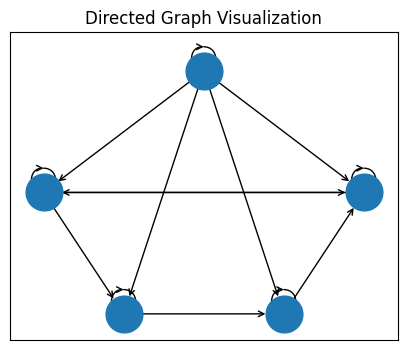

In [28]:
BRG.visualize_graph_data(datas[0],5, {0: (0, 1),1: (2, 1),2: (0.5, 0),3: (1.5, 0),4: (1, 2)})